In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# daatset api
!kaggle competitions download -c cifar-10

 96% 684M/715M [00:08<00:00, 159MB/s]
100% 715M/715M [00:08<00:00, 89.6MB/s]


In [4]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [5]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
!ls

cifar-10.zip  sample_data	    test.7z   trainLabels.csv
kaggle.json   sampleSubmission.csv  train.7z


In [7]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 108.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.4/96.4 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.9/412.9 kB 39.7 MB/s eta 0:00:00


In [8]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()     #archive.extractall(path='/content/Training Data')
archive.close()

In [9]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


Importing the Dependencies

In [10]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [11]:
filenames = os.listdir('/content/train')

In [12]:
type(filenames)

list

In [13]:
len(filenames)

50000

In [14]:
print(filenames[0:5])
print(filenames[-5:])

['34260.png', '3077.png', '49916.png', '32765.png', '14969.png']
['4122.png', '22485.png', '19903.png', '2185.png', '4720.png']


**Labels Processing**

In [15]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [16]:
labels_df.shape

(50000, 2)

In [17]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [18]:
labels_df[labels_df['id'] == 7796]

,id,label
7795,7796,frog


In [19]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [20]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [21]:
labels_df['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [22]:
labels_df['label']

,label
0,frog
1,truck
2,truck
3,deer
4,automobile
...,...
49995,bird
49996,frog
49997,truck
49998,automobile


In [23]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

In [24]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


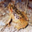

In [25]:
# displaying sample image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/7796.png')
cv2_imshow(img)

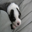

In [26]:
# displaying sample image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/45888.png')
cv2_imshow(img)

In [27]:
labels_df[labels_df['id'] == 45888]

,id,label
45887,45888,dog


In [28]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [29]:
id_list = list(labels_df['id'])

In [30]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


**Image Processing**

In [31]:
# convert images to numpy arrays

train_data_folder = '/content/train/'

data = []

for id in id_list:

  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [32]:
type(data)

list

In [33]:
len(data)

50000

In [34]:
type(data[0])

numpy.ndarray

In [35]:
data[0].shape

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
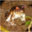

In [36]:
data[0]

In [37]:
# convert image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [38]:
type(X)

numpy.ndarray

In [39]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


**Train Test Split**

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [41]:
print(X.shape, X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [42]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [43]:
X_train_scaled

array([[[[0.81960784, 0.82352941, 0.79607843],
         [0.83529412, 0.83921569, 0.81960784],
         [0.85490196, 0.85882353, 0.84313725],
         ...,
         [0.49803922, 0.29019608, 0.15294118],
         [0.47843137, 0.26666667, 0.1372549 ],
         [0.45490196, 0.24705882, 0.1254902 ]],

        [[0.82352941, 0.82352941, 0.79215686],
         [0.83529412, 0.83921569, 0.81176471],
         [0.85490196, 0.8627451 , 0.83921569],
         ...,
         [0.48627451, 0.2745098 , 0.1372549 ],
         [0.4745098 , 0.2627451 , 0.12941176],
         [0.48235294, 0.27058824, 0.14117647]],

        [[0.80784314, 0.80392157, 0.76470588],
         [0.81960784, 0.81960784, 0.79215686],
         [0.83529412, 0.84313725, 0.81960784],
         ...,
         [0.48627451, 0.2745098 , 0.14509804],
         [0.51372549, 0.30196078, 0.16470588],
         [0.51372549, 0.30588235, 0.16078431]],

        ...,

        [[0.49803922, 0.42352941, 0.38039216],
         [0.54117647, 0.47843137, 0.43137255]

array([[[209, 210, 203],
        [213, 214, 209],
        [218, 219, 215],
        ...,
        [127,  74,  39],
        [122,  68,  35],
        [116,  63,  32]],

       [[210, 210, 202],
        [213, 214, 207],
        [218, 220, 214],
        ...,
        [124,  70,  35],
        [121,  67,  33],
        [123,  69,  36]],

       [[206, 205, 195],
        [209, 209, 202],
        [213, 215, 209],
        ...,
        [124,  70,  37],
        [131,  77,  42],
        [131,  78,  41]],

       ...,

       [[127, 108,  97],
        [138, 122, 110],
        [141, 127, 118],
        ...,
        [158, 149, 134],
        [161, 156, 151],
        [136, 137, 148]],

       [[145, 130, 119],
        [148, 135, 128],
        [136, 127, 128],
        ...,
        [175, 174, 172],
        [160, 161, 170],
        [143, 148, 164]],

       [[138, 128, 123],
        [140, 132, 136],
        [136, 131, 140],
        ...,
        [150, 154, 169],
        [145, 149, 166],
        [140, 145, 163]]], dtype=uint8)
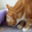

In [44]:
X_train[0]

**Building the Neural Network**

In [45]:
import tensorflow as tf
from tensorflow import keras

In [46]:
num_of_classes = 10

# setting up the layers of Neural Network

model = keras.Sequential([

    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [47]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [48]:
# training the neural network
model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.2205 - loss: 2.0989 - val_acc: 0.3092 - val_loss: 1.8618
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - acc: 0.3196 - loss: 1.8628 - val_acc: 0.3108 - val_loss: 1.8552
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.3282 - loss: 1.8441 - val_acc: 0.3445 - val_loss: 1.7985
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.3334 - loss: 1.8292 - val_acc: 0.3260 - val_loss: 1.8446
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.3393 - loss: 1.8112 - val_acc: 0.3528 - val_loss: 1.7899
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.3504 - loss: 1.7951 - val_acc: 0.3580 - val_loss: 1.7803
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.3516 - loss: 1.7949 - val_acc: 0.3570 - val_loss: 1.7741
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.3589 - loss: 1.7722 - val_acc: 0.3565 - val_loss: 1.7927
Epoch 9/10
1125/1125 ━━━━━━━━━━━━━━━━━━━

**ResNet50**

In [49]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [50]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [51]:
num_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [55]:
from tensorflow.keras import optimizers

model.compile(
    optimizer=optimizers.RMSprop(learning_rate=2e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [56]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 455s 359ms/step - accuracy: 0.3261 - loss: 2.0474 - val_accuracy: 0.7567 - val_loss: 0.9366
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 401s 356ms/step - accuracy: 0.6693 - loss: 1.0843 - val_accuracy: 0.8953 - val_loss: 0.4672
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 356ms/step - accuracy: 0.7938 - loss: 0.7753 - val_accuracy: 0.9133 - val_loss: 0.3696
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 441s 356ms/step - accuracy: 0.8611 - loss: 0.5920 - val_accuracy: 0.9285 - val_loss: 0.2905
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 443s 356ms/step - accuracy: 0.9074 - loss: 0.4522 - val_accuracy: 0.9350 - val_loss: 0.2572
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 356ms/step - accuracy: 0.9327 - loss: 0.3660 - val_accuracy: 0.9358 - val_loss: 0.2490
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 432s 347ms/step - accuracy: 0.9526 - loss: 0.2833 - val_accuracy: 0.9440 - val_loss: 0.2136
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 452s 356ms/step - ac

In [72]:
model.save('my_model.h5')  # Saves the full model (architecture + weights)


In [73]:
from google.colab import files
files.download('my_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [74]:
from tensorflow.keras.models import load_model
model = load_model('my_model.h5')


In [60]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 113ms/step - accuracy: 0.9388 - loss: 0.2304
Test Accuracy = 0.939300000667572


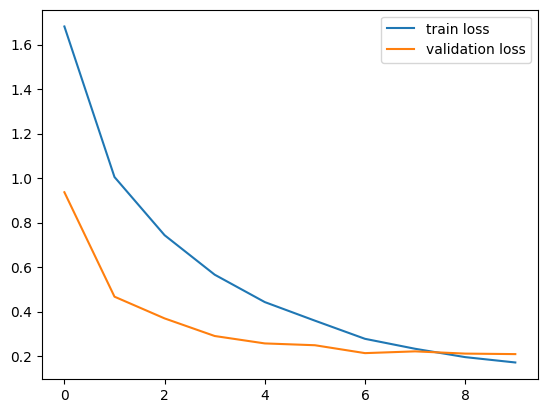

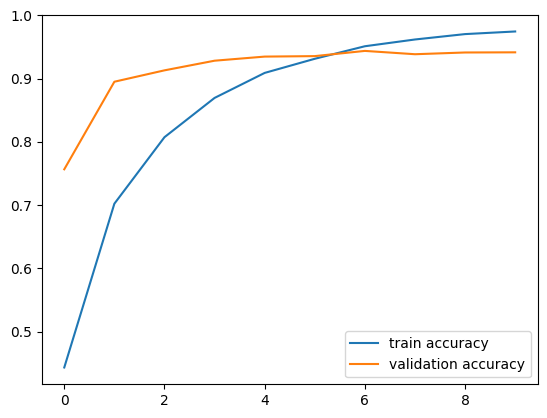

In [63]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

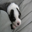

In [64]:
import cv2
from google.colab.patches import cv2_imshow

# Read the image from the path
img = cv2.imread('/content/train/45888.png')

# Optional: Check if image was loaded correctly
if img is not None:
    # OpenCV reads images in BGR, but cv2_imshow works fine directly in Colab
    cv2_imshow(img)
else:
    print("Image not found. Please check the path.")


In [65]:
import numpy as np

# Step 1: (Optional) Normalize the test data if you did it for training
# Example: If X was normalized before training
X_test_scaled = X_test.astype('float32') / 255.0

# Step 2: Predict
predictions = model.predict(X_test_scaled)  # shape: (num_samples, num_classes)

# Step 3: Convert to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Step 4: Print or compare
print("Predicted labels:", predicted_labels)
print("True labels     :", Y_test)

# Step 5: (Optional) Accuracy
accuracy = np.mean(predicted_labels == Y_test)
print("Test Accuracy:", accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 113ms/step
Predicted labels: [2 1 4 ... 9 1 8]
True labels     : [2 1 4 ... 9 1 8]
Test Accuracy: 0.9393


In [66]:
import numpy as np

# Step 1: (Optional) Scale if your model was trained on scaled data
X_test_scaled = X_test.astype('float32') / 255.0  # Only if you scaled X during training

# Step 2: Predict only the first 5 samples
predictions = model.predict(X_test_scaled[:5])  # shape: (5, num_classes)

# Step 3: Convert to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Step 4: Print results
print("Predicted labels:", predicted_labels)
print("True labels     :", Y_test[:5])


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted labels: [2 1 4 2 5]
True labels     : [2 1 4 2 5]


In [67]:
import numpy as np

# Step 1: (Optional) Scale if your model was trained on scaled data
X_test_scaled = X_test.astype('float32') / 255.0  # Only if you scaled X during training

# Step 2: Predict only the first 5 samples
predictions = model.predict(X_test_scaled[:10])  # shape: (5, num_classes)

# Step 3: Convert to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Step 4: Print results
print("Predicted labels:", predicted_labels)
print("True labels     :", Y_test[:10])


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicted labels: [2 1 4 2 5 6 4 3 8 2]
True labels     : [2 1 4 2 5 6 4 3 8 2]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


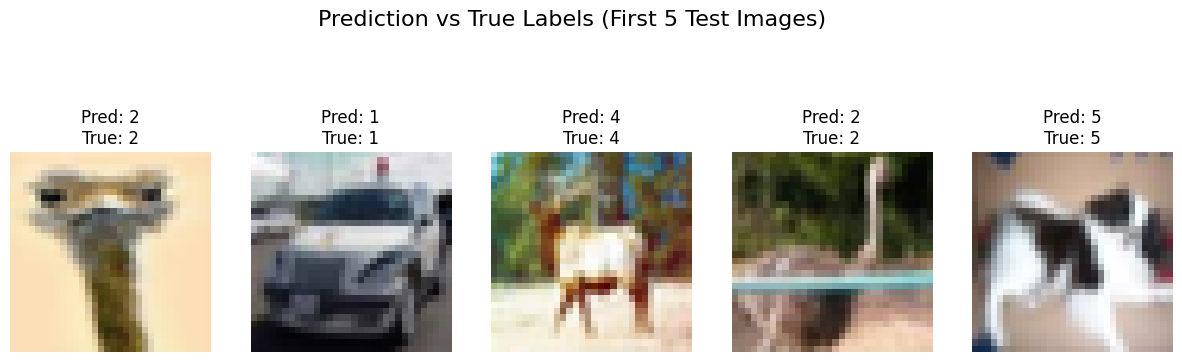

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# Optional: Scale if your model needs it
X_test_scaled = X_test.astype('float32') / 255.0

# Predict for first 5
predictions = model.predict(X_test_scaled[:5])
predicted_labels = np.argmax(predictions, axis=1)

# Plot images with predictions and true labels
plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)

    img = X_test[i]

    # If scaled, convert back for display
    if img.max() <= 1.0:
        img = (img * 255).astype('uint8')

    # If image is flattened, reshape it
    if len(img.shape) == 1:
        img = img.reshape(32, 32, 3)  # Adjust if needed

    plt.imshow(img)
    plt.title(f"Pred: {predicted_labels[i]}\nTrue: {Y_test[i]}")
    plt.axis('off')

plt.suptitle("Prediction vs True Labels (First 5 Test Images)", fontsize=16)
plt.show()


In [69]:
import cv2
import numpy as np

# Make sure the model is loaded (assumes 'model' is defined elsewhere)
# from tensorflow.keras.models import load_model
# model = load_model('your_model_path.h5')

# Correct path usage (raw string is fine as-is)
image_path = r"/content/WhatsApp Image 2025-06-18 at 21.18.27_ac59c657.jpg"

# Load the image
img = cv2.imread(image_path)

if img is None:
    print("Error: Image not found or cannot be loaded.")
else:
    # Resize image to model's expected input size (32x32)
    img_resized = cv2.resize(img, (32, 32))

    # Convert BGR (OpenCV default) to RGB if your model expects RGB input
    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)

    # Normalize pixel values to [0, 1]
    img_normalized = img_rgb.astype('float32') / 255.0

    # Add batch dimension: model expects (1, 32, 32, 3)
    input_img = np.expand_dims(img_normalized, axis=0)

    # Predict
    prediction = model.predict(input_img)

    # Get predicted class label
    predicted_class = np.argmax(prediction, axis=1)[0]

    print("Predicted class label:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted class label: 5


In [70]:
import cv2
import numpy as np

# Make sure the model is loaded (assumes 'model' is defined elsewhere)
# from tensorflow.keras.models import load_model
# model = load_model('your_model_path.h5')

# Correct path usage (raw string is fine as-is)
image_path = r"/content/WhatsApp Image 2025-06-18 at 21.23.23_a4317929.jpg"

# Load the image
img = cv2.imread(image_path)

if img is None:
    print("Error: Image not found or cannot be loaded.")
else:
    # Resize image to model's expected input size (32x32)
    img_resized = cv2.resize(img, (32, 32))

    # Convert BGR (OpenCV default) to RGB if your model expects RGB input
    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)

    # Normalize pixel values to [0, 1]
    img_normalized = img_rgb.astype('float32') / 255.0

    # Add batch dimension: model expects (1, 32, 32, 3)
    input_img = np.expand_dims(img_normalized, axis=0)

    # Predict
    prediction = model.predict(input_img)

    # Get predicted class label
    predicted_class = np.argmax(prediction, axis=1)[0]

    print("Predicted class label:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted class label: 3


In [71]:
import cv2
import numpy as np

# Make sure the model is loaded (assumes 'model' is defined elsewhere)
# from tensorflow.keras.models import load_model
# model = load_model('your_model_path.h5')

# Correct path usage (raw string is fine as-is)
image_path = r"/content/WhatsApp Image 2025-06-18 at 21.26.07_e0811a64.jpg"

# Load the image
img = cv2.imread(image_path)

if img is None:
    print("Error: Image not found or cannot be loaded.")
else:
    # Resize image to model's expected input size (32x32)
    img_resized = cv2.resize(img, (32, 32))

    # Convert BGR (OpenCV default) to RGB if your model expects RGB input
    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)

    # Normalize pixel values to [0, 1]
    img_normalized = img_rgb.astype('float32') / 255.0

    # Add batch dimension: model expects (1, 32, 32, 3)
    input_img = np.expand_dims(img_normalized, axis=0)

    # Predict
    prediction = model.predict(input_img)

    # Get predicted class label
    predicted_class = np.argmax(prediction, axis=1)[0]

    print("Predicted class label:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted class label: 0


In [75]:
import cv2
import numpy as np

# Make sure the model is loaded (assumes 'model' is defined elsewhere)
# from tensorflow.keras.models import load_model
# model = load_model('your_model_path.h5')

# Correct path usage (raw string is fine as-is)
image_path = r"/content/WhatsApp Image 2025-06-19 at 11.24.00_cfd2d591.jpg"

# Load the image
img = cv2.imread(image_path)

if img is None:
    print("Error: Image not found or cannot be loaded.")
else:
    # Resize image to model's expected input size (32x32)
    img_resized = cv2.resize(img, (32, 32))

    # Convert BGR (OpenCV default) to RGB if your model expects RGB input
    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)

    # Normalize pixel values to [0, 1]
    img_normalized = img_rgb.astype('float32') / 255.0

    # Add batch dimension: model expects (1, 32, 32, 3)
    input_img = np.expand_dims(img_normalized, axis=0)

    # Predict
    prediction = model.predict(input_img)

    # Get predicted class label
    predicted_class = np.argmax(prediction, axis=1)[0]

    print("Predicted class label:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Predicted class label: 3


In [92]:
import cv2
import numpy as np

# Make sure the model is loaded (assumes 'model' is defined elsewhere)
# from tensorflow.keras.models import load_model
# model = load_model('your_model_path.h5')

# Correct path usage (raw string is fine as-is)
image_path = r"/content/WhatsApp Image 2025-06-19 at 11.25.55_f153902f.jpg"

# Load the image
img = cv2.imread(image_path)

if img is None:
    print("Error: Image not found or cannot be loaded.")
else:
    # Resize image to model's expected input size (32x32)
    img_resized = cv2.resize(img, (32, 32))

    # Convert BGR (OpenCV default) to RGB if your model expects RGB input
    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)

    # Normalize pixel values to [0, 1]
    img_normalized = img_rgb.astype('float32') / 255.0

    # Add batch dimension: model expects (1, 32, 32, 3)
    input_img = np.expand_dims(img_normalized, axis=0)

    # Predict
    prediction = model.predict(input_img)
    print(prediction)

    # Get predicted class label
    predicted_class = np.argmax(prediction, axis=1)[0]

    print("Predicted class label:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[[0.0276505  0.02433805 0.00637508 0.2368292  0.05784635 0.27912524
  0.12049208 0.22341281 0.01071774 0.0132129 ]]
Predicted class label: 5


In [94]:
import cv2
import numpy as np

img = cv2.imread('/content/WhatsApp Image 2025-06-19 at 11.25.55_f153902f.jpg')         # Load image
img = cv2.resize(img, (32, 32))     # Resize to 32x32
img = img / 255.0                   # Normalize (0 to 1)
img = np.expand_dims(img, axis=0)   # Add batch dimension: (1, 32, 32, 3)


In [95]:
prediction = model.predict(img)
print(prediction)  # This will show probabilities for each class


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[[0.78862405 0.00565686 0.00497423 0.09265041 0.03155021 0.03021951
  0.0105732  0.02139869 0.01065489 0.00369808]]


In [79]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)


In [86]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Predict probabilities
y_pred = model.predict(X_test)

# Get predicted class indices
y_pred_classes = np.argmax(y_pred, axis=1)

# If Y_test is one-hot encoded, convert it to class indices
if Y_test.ndim > 1 and Y_test.shape[1] > 1:
    Y_test_classes = np.argmax(Y_test, axis=1)
else:
    Y_test_classes = Y_test

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(Y_test_classes, y_pred_classes))

# Print classification report
print("\nClassification Report:")
print(classification_report(Y_test_classes, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 98ms/step
Confusion Matrix:
[[   1    0    0 1028    0    0    0    0    0    0]
 [   0    0    0  996    0    0    0    0    0    0]
 [   1    0    0 1030    0    0    0    0    0    0]
 [   1    0    0  981    0    0    0    0    0    0]
 [   1    0    0 1007    0    0    0    0    0    0]
 [   0    0    1  997    0    0    0    0    0    0]
 [   1    0    1  992    0    0    0    0    0    0]
 [   4    0    1  993    0    0    0    0    0    0]
 [   0    0    1  988    0    0    0    0    0    0]
 [   0    0    0  975    0    0    0    0    0    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.11      0.00      0.00      1029
           1       0.00      0.00      0.00       996
           2       0.00      0.00      0.00      1031
           3       0.10      1.00      0.18       982
           4       0.00      0.00      0.00      1008
           5       0.00      0.00      0.00       998
     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [88]:
import cv2
import numpy as np

# Make sure the model is loaded (assumes 'model' is defined elsewhere)
# from tensorflow.keras.models import load_model
# model = load_model('your_model_path.h5')

# Correct path usage (raw string is fine as-is)
image_path = r"/content/WhatsApp Image 2025-06-19 at 11.39.44_fdb20901.jpg"

# Load the image
img = cv2.imread(image_path)

if img is None:
    print("Error: Image not found or cannot be loaded.")
else:
    # Resize image to model's expected input size (32x32)
    img_resized = cv2.resize(img, (32, 32))

    # Convert BGR (OpenCV default) to RGB if your model expects RGB input
    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)

    # Normalize pixel values to [0, 1]
    img_normalized = img_rgb.astype('float32') / 255.0

    # Add batch dimension: model expects (1, 32, 32, 3)
    input_img = np.expand_dims(img_normalized, axis=0)

    # Predict
    prediction = model.predict(input_img)
    print(prediction)

    # Get predicted class label
    predicted_class = np.argmax(prediction, axis=1)[0]

    print("Predicted class label:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
[[2.9703721e-03 1.0016272e-03 1.8650983e-03 9.6826452e-01 1.3034792e-02
  6.4695482e-03 1.6741026e-03 2.1982328e-03 1.9227574e-03 5.9881742e-04]]
Predicted class label: 3


In [96]:
import cv2
import numpy as np

# Make sure the model is loaded (assumes 'model' is defined elsewhere)
# from tensorflow.keras.models import load_model
# model = load_model('your_model_path.h5')

# Correct path usage (raw string is fine as-is)
image_path = r"/content/WhatsApp Image 2025-06-19 at 11.51.29_c2485be5.jpg"

# Load the image
img = cv2.imread(image_path)

if img is None:
    print("Error: Image not found or cannot be loaded.")
else:
    # Resize image to model's expected input size (32x32)
    img_resized = cv2.resize(img, (32, 32))

    # Convert BGR (OpenCV default) to RGB if your model expects RGB input
    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)

    # Normalize pixel values to [0, 1]
    img_normalized = img_rgb.astype('float32') / 255.0

    # Add batch dimension: model expects (1, 32, 32, 3)
    input_img = np.expand_dims(img_normalized, axis=0)

    # Predict
    prediction = model.predict(input_img)
    print(prediction)

    # Get predicted class label
    predicted_class = np.argmax(prediction, axis=1)[0]

    print("Predicted class label:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
[[9.9305916e-01 2.0842675e-04 2.3606755e-03 6.3972600e-04 6.9971458e-04
  1.3110662e-03 3.7911709e-04 3.8800083e-04 6.4942945e-04 3.0460811e-04]]
Predicted class label: 0
